In [ ]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

In [ ]:
data = arff.loadarff('MC1.arff')
df = pd.DataFrame(data[0])
df.head()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,8.0,17.0,12.0,1.0,11.0,30.0,9.0,0.16,14.0,8.0,...,38.0,0.12,69.0,95.0,33.0,20.0,76.0,18.18,55.0,b'N'
1,2.0,5.0,3.0,1.0,0.0,8.0,3.0,0.19,4.0,3.0,...,14.0,0.15,26.0,31.0,15.0,10.0,20.0,6.25,16.0,b'N'
2,11.0,7.0,2.0,0.0,117.0,12.0,4.0,0.08,6.0,4.0,...,34.0,0.02,188.0,252.0,18.0,23.0,183.0,68.82,53.0,b'N'
3,0.0,5.0,1.0,0.0,0.0,8.0,3.0,0.60,4.0,2.0,...,8.0,0.43,5.0,8.0,4.0,6.0,7.0,0.00,5.0,b'N'
4,0.0,1.0,2.0,0.0,2.0,0.0,1.0,0.20,0.0,1.0,...,4.0,0.11,10.0,18.0,4.0,9.0,9.0,28.57,5.0,b'N'


In [ ]:
# Untuk melihat deskripsi singkat data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LOC_BLANK                        1988 non-null   float64
 1   BRANCH_COUNT                     1988 non-null   float64
 2   CALL_PAIRS                       1988 non-null   float64
 3   LOC_CODE_AND_COMMENT             1988 non-null   float64
 4   LOC_COMMENTS                     1988 non-null   float64
 5   CONDITION_COUNT                  1988 non-null   float64
 6   CYCLOMATIC_COMPLEXITY            1988 non-null   float64
 7   CYCLOMATIC_DENSITY               1988 non-null   float64
 8   DECISION_COUNT                   1988 non-null   float64
 9   DESIGN_COMPLEXITY                1988 non-null   float64
 10  DESIGN_DENSITY                   1988 non-null   float64
 11  EDGE_COUNT                       1988 non-null   float64
 12  ESSENTIAL_COMPLEXITY

In [ ]:
df.describe()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
count,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,...,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000
mean,4.643360,7.304326,3.100604,2.051811,4.704728,10.530181,3.894869,0.293134,4.984909,2.827465,...,5.269115,16.336016,0.192641,42.314386,61.073944,15.045272,11.296278,33.105634,18.955619,20.887827
std,7.251612,15.449528,4.474604,5.651232,12.056771,25.823967,7.955621,0.240868,12.521055,6.884109,...,12.918603,31.925851,0.217999,95.588313,130.981295,16.755561,7.454424,46.904468,20.922315,33.170678
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.140000,0.000000,1.000000,...,0.000000,4.000000,0.090000,7.000000,12.000000,5.000000,6.000000,9.000000,0.000000,5.000000
50%,2.000000,3.000000,2.000000,0.000000,1.000000,4.000000,2.000000,0.230000,2.000000,1.000000,...,2.000000,9.000000,0.140000,19.000000,29.000000,11.000000,10.000000,19.000000,13.640000,11.000000
75%,6.000000,7.000000,4.000000,2.000000,4.000000,12.000000,4.000000,0.330000,6.000000,3.000000,...,6.000000,18.000000,0.210000,43.000000,63.000000,20.000000,14.000000,37.000000,32.500000,24.000000
max,87.000000,351.000000,72.000000,98.000000,117.000000,630.000000,192.000000,1.000000,312.000000,186.000000,...,315.000000,739.000000,2.000000,2279.000000,2948.000000,197.000000,100.000000,727.000000,95.760000,639.000000


In [ ]:
df.isna().sum().sort_values(ascending = False)

LOC_BLANK                          0
NODE_COUNT                         0
HALSTEAD_LENGTH                    0
HALSTEAD_LEVEL                     0
HALSTEAD_PROG_TIME                 0
HALSTEAD_VOLUME                    0
MAINTENANCE_SEVERITY               0
MODIFIED_CONDITION_COUNT           0
MULTIPLE_CONDITION_COUNT           0
NORMALIZED_CYLOMATIC_COMPLEXITY    0
HALSTEAD_EFFORT                    0
NUM_OPERANDS                       0
NUM_OPERATORS                      0
NUM_UNIQUE_OPERANDS                0
NUM_UNIQUE_OPERATORS               0
NUMBER_OF_LINES                    0
PERCENT_COMMENTS                   0
LOC_TOTAL                          0
HALSTEAD_ERROR_EST                 0
HALSTEAD_DIFFICULTY                0
BRANCH_COUNT                       0
DESIGN_COMPLEXITY                  0
CALL_PAIRS                         0
LOC_CODE_AND_COMMENT               0
LOC_COMMENTS                       0
CONDITION_COUNT                    0
CYCLOMATIC_COMPLEXITY              0
C

DATA PREPROCESSING

### TRANSFORMASI DATASET

In [ ]:
ind_col = [col for col in df.columns if col != 'Defective']
dep_col = 'Defective'

In [ ]:
df[dep_col].value_counts()

Defective
b'N'    1942
b'Y'      46
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
# label encoding > special handling for class
label_encoder = LabelEncoder() # Create an instance of LabelEncoder

# Fit and transform the 'label' column
df['Defective'] = label_encoder.fit_transform(df['Defective'])

# show
df.head()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,8.0,17.0,12.0,1.0,11.0,30.0,9.0,0.16,14.0,8.0,...,38.0,0.12,69.0,95.0,33.0,20.0,76.0,18.18,55.0,0
1,2.0,5.0,3.0,1.0,0.0,8.0,3.0,0.19,4.0,3.0,...,14.0,0.15,26.0,31.0,15.0,10.0,20.0,6.25,16.0,0
2,11.0,7.0,2.0,0.0,117.0,12.0,4.0,0.08,6.0,4.0,...,34.0,0.02,188.0,252.0,18.0,23.0,183.0,68.82,53.0,0
3,0.0,5.0,1.0,0.0,0.0,8.0,3.0,0.60,4.0,2.0,...,8.0,0.43,5.0,8.0,4.0,6.0,7.0,0.00,5.0,0
4,0.0,1.0,2.0,0.0,2.0,0.0,1.0,0.20,0.0,1.0,...,4.0,0.11,10.0,18.0,4.0,9.0,9.0,28.57,5.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LOC_BLANK                        1988 non-null   float64
 1   BRANCH_COUNT                     1988 non-null   float64
 2   CALL_PAIRS                       1988 non-null   float64
 3   LOC_CODE_AND_COMMENT             1988 non-null   float64
 4   LOC_COMMENTS                     1988 non-null   float64
 5   CONDITION_COUNT                  1988 non-null   float64
 6   CYCLOMATIC_COMPLEXITY            1988 non-null   float64
 7   CYCLOMATIC_DENSITY               1988 non-null   float64
 8   DECISION_COUNT                   1988 non-null   float64
 9   DESIGN_COMPLEXITY                1988 non-null   float64
 10  DESIGN_DENSITY                   1988 non-null   float64
 11  EDGE_COUNT                       1988 non-null   float64
 12  ESSENTIAL_COMPLEXITY

In [ ]:
# Pre-processing dataset yang digunakan
# Normalisasi min max -> pembagian data dengan yang data terbesar
scaler = MinMaxScaler()
# axis = 1 -> mempresentasifkan label di kolom
# axis = 0 -> mempresentasifkan label di row
# Untuk menormalisasikan data menggunakan min max
scaled_data = scaler.fit_transform(df.drop('Defective', axis = 1))
# Untuk menambahka kolom pada data
preprocessed_data = pd.DataFrame(scaled_data, columns = df.columns[:-1])
# Untuk menambahkan kolom defect
print(df)

      LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0           8.0          17.0        12.0                   1.0          11.0   
1           2.0           5.0         3.0                   1.0           0.0   
2          11.0           7.0         2.0                   0.0         117.0   
3           0.0           5.0         1.0                   0.0           0.0   
4           0.0           1.0         2.0                   0.0           2.0   
...         ...           ...         ...                   ...           ...   
1983        4.0           5.0         5.0                   0.0           3.0   
1984        0.0           1.0         0.0                   0.0           0.0   
1985       17.0           1.0         3.0                   0.0           0.0   
1986        0.0           1.0         2.0                   0.0           0.0   
1987        5.0           3.0         1.0                   0.0           2.0   

      CONDITION_COUNT  CYCL

In [ ]:
# Standar machine learning / penamaan variable
# X -> 20 fitur yang telah di normalisasi
X = preprocessed_data
# Y -> label yang akan diprediksi atau kolom defects
Y = df['Defective']
print(X)
# X.info()

      LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0      0.091954      0.045714    0.166667              0.010204      0.094017   
1      0.022989      0.011429    0.041667              0.010204      0.000000   
2      0.126437      0.017143    0.027778              0.000000      1.000000   
3      0.000000      0.011429    0.013889              0.000000      0.000000   
4      0.000000      0.000000    0.027778              0.000000      0.017094   
...         ...           ...         ...                   ...           ...   
1983   0.045977      0.011429    0.069444              0.000000      0.025641   
1984   0.000000      0.000000    0.000000              0.000000      0.000000   
1985   0.195402      0.000000    0.041667              0.000000      0.000000   
1986   0.000000      0.000000    0.027778              0.000000      0.000000   
1987   0.057471      0.005714    0.013889              0.000000      0.017094   

      CONDITION_COUNT  CYCL

### SMOTE

<Axes: xlabel='Defective', ylabel='count'>

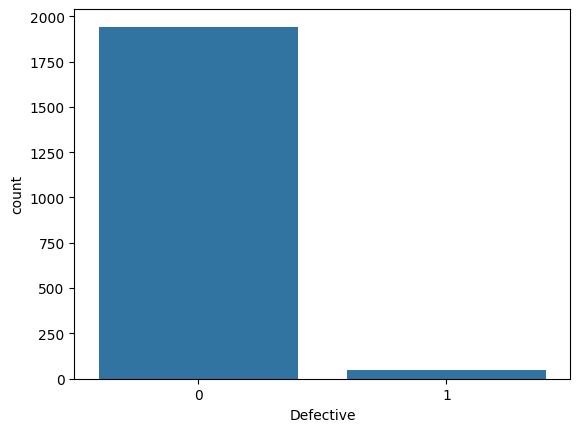

In [ ]:
# Get the value counts
sns.countplot(df, x="Defective")

In [ ]:
# Penyeimbangan class dengan menggunakan SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X, Y = smote.fit_resample(X, Y)

Defective
0            1942
1            1942
Name: count, dtype: int64



Text(0.5, 1.0, 'Train Class')

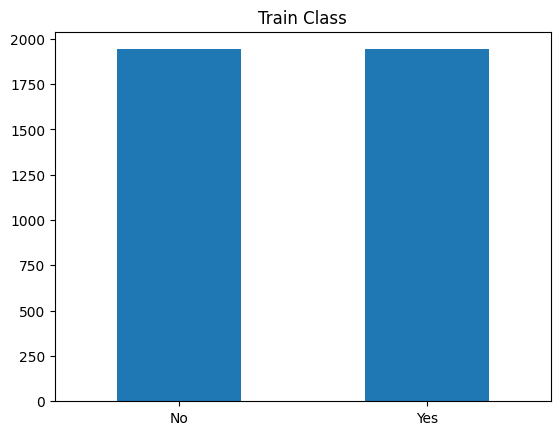

In [ ]:
# imbalanced class
df_Y = pd.DataFrame(Y)
print(f'{df_Y.value_counts()}\n')

df_Y.value_counts().plot(kind='bar')
plt.xticks([0, 1],['No','Yes'], rotation=0)
plt.xlabel('')
plt.title('Train Class')

In [ ]:
# Penyeimbangan class dengan menggunakan SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_resampled, Y_resampled = smote.fit_resample(X, Y)
print(X_resampled)

      LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0      0.091954      0.045714    0.166667              0.010204      0.094017   
1      0.022989      0.011429    0.041667              0.010204      0.000000   
2      0.126437      0.017143    0.027778              0.000000      1.000000   
3      0.000000      0.011429    0.013889              0.000000      0.000000   
4      0.000000      0.000000    0.027778              0.000000      0.017094   
...         ...           ...         ...                   ...           ...   
3879   0.106000      0.039047    0.064813              0.137184      0.097812   
3880   0.102434      0.024048    0.027642              0.070728      0.114253   
3881   0.080107      0.034110    0.027920              0.091419      0.059304   
3882   0.000000      0.000000    0.000589              0.010204      0.000000   
3883   0.070075      0.029123    0.031960              0.079545      0.044385   

      CONDITION_COUNT  CYCL

### SPLITTING DATA

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

print("\n shape of train split: ")
print(X_train.shape, Y_train.shape)
print("\n shape of test split: ")
print(X_test.shape, Y_test.shape)


 shape of train split: 
(3107, 38) (3107,)

 shape of test split: 
(777, 38) (777,)


### FEATURE SELECTION

In [ ]:
num_ants = 10
evaporation_rate = 0.5
alpha = 1.0
beta = 2.0
num_iterations = 5
best_features = None
num_best_features = 10
best_accuracy = 0.0

In [ ]:
num_features = X_train.shape[1]
pheromone_levels = np.ones(num_features)

In [ ]:
def feature_slection(alpha, pheromone_levels):
  features_selected = []
  remaining_features = set(range(len(pheromone_levels)))

  while remaining_features:
      probabilities = pheromone_levels[list(remaining_features)] **alpha
      probabilities /= probabilities.sum()

      selected_feature = np.random.choice(list(remaining_features), p=probabilities)
      features_selected.append(selected_feature)
      remaining_features.remove(selected_feature)

  return features_selected

In [ ]:
column_names = df.columns.tolist()

# Remove the last element (class)
column_names = column_names[:-1]
column_names

['LOC_BLANK',
 'BRANCH_COUNT',
 'CALL_PAIRS',
 'LOC_CODE_AND_COMMENT',
 'LOC_COMMENTS',
 'CONDITION_COUNT',
 'CYCLOMATIC_COMPLEXITY',
 'CYCLOMATIC_DENSITY',
 'DECISION_COUNT',
 'DESIGN_COMPLEXITY',
 'DESIGN_DENSITY',
 'EDGE_COUNT',
 'ESSENTIAL_COMPLEXITY',
 'ESSENTIAL_DENSITY',
 'LOC_EXECUTABLE',
 'PARAMETER_COUNT',
 'GLOBAL_DATA_COMPLEXITY',
 'GLOBAL_DATA_DENSITY',
 'HALSTEAD_CONTENT',
 'HALSTEAD_DIFFICULTY',
 'HALSTEAD_EFFORT',
 'HALSTEAD_ERROR_EST',
 'HALSTEAD_LENGTH',
 'HALSTEAD_LEVEL',
 'HALSTEAD_PROG_TIME',
 'HALSTEAD_VOLUME',
 'MAINTENANCE_SEVERITY',
 'MODIFIED_CONDITION_COUNT',
 'MULTIPLE_CONDITION_COUNT',
 'NODE_COUNT',
 'NORMALIZED_CYLOMATIC_COMPLEXITY',
 'NUM_OPERANDS',
 'NUM_OPERATORS',
 'NUM_UNIQUE_OPERANDS',
 'NUM_UNIQUE_OPERATORS',
 'NUMBER_OF_LINES',
 'PERCENT_COMMENTS',
 'LOC_TOTAL']

In [ ]:
#simulate ant movement
num_features = X_train.shape[1]
pheromone_levels = np.ones(num_features)

for iteration in range(num_iterations):
    ant_paths = []
    print(f'Iteration number {iteration}')
    for ant in range(num_ants):
        features_selected = feature_slection(alpha,pheromone_levels)

        ant_paths.append(features_selected)

        features_names=[(column_names)[i] for i in features_selected]


        # Evaluate solution
        clf = RandomForestClassifier(random_state=42)
        clf.fit(X_train.iloc[:,features_selected], Y_train.values.ravel())
        y_pred = clf.predict(X_test.iloc[:,features_selected])
        accuracy = accuracy_score(Y_test, y_pred)
        print(f'\t\tPaths:{ant_paths} \t Selected features to be tested: {features_names} \t accuracy: {accuracy} \n\t\t---------------------------------------')

        # Update pheromone levels
        pheromone_levels *= (1 - evaporation_rate)
        pheromone_levels[features_selected] += accuracy

        # Update global best solution
        if accuracy > best_accuracy:
            best_features = features_selected
            best_accuracy = accuracy
            print(f'\t\t!!!!!!best features:{best_features} \t accuracy: {best_accuracy} \n---------------------------------------')

Iteration number 0
		Paths:[[32, 8, 36, 29, 34, 26, 0, 30, 15, 24, 21, 19, 20, 13, 1, 3, 17, 6, 10, 2, 23, 31, 22, 27, 18, 5, 37, 12, 11, 33, 9, 16, 14, 4, 35, 28, 25, 7]] 	 Selected features to be tested: ['NUM_OPERATORS', 'DECISION_COUNT', 'PERCENT_COMMENTS', 'NODE_COUNT', 'NUM_UNIQUE_OPERATORS', 'MAINTENANCE_SEVERITY', 'LOC_BLANK', 'NORMALIZED_CYLOMATIC_COMPLEXITY', 'PARAMETER_COUNT', 'HALSTEAD_PROG_TIME', 'HALSTEAD_ERROR_EST', 'HALSTEAD_DIFFICULTY', 'HALSTEAD_EFFORT', 'ESSENTIAL_DENSITY', 'BRANCH_COUNT', 'LOC_CODE_AND_COMMENT', 'GLOBAL_DATA_DENSITY', 'CYCLOMATIC_COMPLEXITY', 'DESIGN_DENSITY', 'CALL_PAIRS', 'HALSTEAD_LEVEL', 'NUM_OPERANDS', 'HALSTEAD_LENGTH', 'MODIFIED_CONDITION_COUNT', 'HALSTEAD_CONTENT', 'CONDITION_COUNT', 'LOC_TOTAL', 'ESSENTIAL_COMPLEXITY', 'EDGE_COUNT', 'NUM_UNIQUE_OPERANDS', 'DESIGN_COMPLEXITY', 'GLOBAL_DATA_COMPLEXITY', 'LOC_EXECUTABLE', 'LOC_COMMENTS', 'NUMBER_OF_LINES', 'MULTIPLE_CONDITION_COUNT', 'HALSTEAD_VOLUME', 'CYCLOMATIC_DENSITY'] 	 accuracy: 0.99227

In [ ]:
best_features_names=[(column_names)[i] for i in best_features[:num_best_features]]
print("Best Feature Subset:", best_features_names)
print("Best Accuracy:", best_accuracy)

Best Feature Subset: ['LOC_TOTAL', 'PERCENT_COMMENTS', 'HALSTEAD_DIFFICULTY', 'DESIGN_COMPLEXITY', 'LOC_CODE_AND_COMMENT', 'CONDITION_COUNT', 'NODE_COUNT', 'LOC_COMMENTS', 'ESSENTIAL_COMPLEXITY', 'GLOBAL_DATA_COMPLEXITY']
Best Accuracy: 0.9935649935649936


In [ ]:
best_features_names

['LOC_TOTAL',
 'PERCENT_COMMENTS',
 'HALSTEAD_DIFFICULTY',
 'DESIGN_COMPLEXITY',
 'LOC_CODE_AND_COMMENT',
 'CONDITION_COUNT',
 'NODE_COUNT',
 'LOC_COMMENTS',
 'ESSENTIAL_COMPLEXITY',
 'GLOBAL_DATA_COMPLEXITY']

In [ ]:
df

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,8.0,17.0,12.0,1.0,11.0,30.0,9.0,0.16,14.0,8.0,...,38.0,0.12,69.0,95.0,33.0,20.0,76.0,18.18,55.0,0
1,2.0,5.0,3.0,1.0,0.0,8.0,3.0,0.19,4.0,3.0,...,14.0,0.15,26.0,31.0,15.0,10.0,20.0,6.25,16.0,0
2,11.0,7.0,2.0,0.0,117.0,12.0,4.0,0.08,6.0,4.0,...,34.0,0.02,188.0,252.0,18.0,23.0,183.0,68.82,53.0,0
3,0.0,5.0,1.0,0.0,0.0,8.0,3.0,0.60,4.0,2.0,...,8.0,0.43,5.0,8.0,4.0,6.0,7.0,0.00,5.0,0
4,0.0,1.0,2.0,0.0,2.0,0.0,1.0,0.20,0.0,1.0,...,4.0,0.11,10.0,18.0,4.0,9.0,9.0,28.57,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,4.0,5.0,5.0,0.0,3.0,4.0,3.0,0.27,2.0,3.0,...,15.0,0.15,13.0,15.0,10.0,6.0,20.0,21.43,11.0,0
1984,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.00,0.0,1.0,...,2.0,0.50,0.0,0.0,0.0,0.0,2.0,0.00,0.0,0
1985,17.0,1.0,3.0,0.0,0.0,0.0,1.0,0.09,0.0,1.0,...,7.0,0.03,19.0,26.0,11.0,9.0,31.0,0.00,11.0,0
1986,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.00,0.0,1.0,...,4.0,0.50,2.0,4.0,2.0,3.0,2.0,0.00,0.0,0


### MODEL BUILDING

DECISION TREE

In [ ]:
# Pemanggilan model Decision Tree
clfDct = tree.DecisionTreeClassifier()
# Melatih data
clfDct.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
dt=DecisionTreeClassifier(max_depth=10,criterion="gini")
dt.fit(X_train,Y_train)
predictions = dt.predict(X_test)
accdt=accuracy_score(Y_test, predictions)*100
print("Accuracy of Decision Tree (%): \n",accdt)
#get FPR
recalldt=recall_score(Y_test,predictions)*100
print("Recall of Decision Tree is: \n",recalldt)
precdt=precision_score(Y_test,predictions)*100
print("Precision of Decision Tree is: \n",precdt)

Accuracy of Decision Tree (%): 
 94.46589446589446
Recall of Decision Tree is: 
 97.2972972972973
Precision of Decision Tree is: 
 91.6030534351145


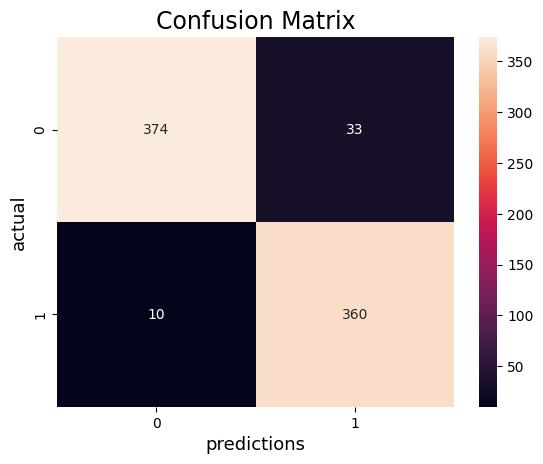

In [ ]:
predictions = dt.predict(X_test)
confusion = confusion_matrix(Y_test, predictions)
sns.heatmap(confusion, annot=True, fmt='g')
plt.ylabel('actual',fontsize=13)
plt.xlabel('predictions',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       407
           1       0.92      0.97      0.94       370

    accuracy                           0.94       777
   macro avg       0.94      0.95      0.94       777
weighted avg       0.95      0.94      0.94       777



SVM

In [ ]:
from sklearn.model_selection import cross_val_score
svm=clf = SVC(gamma="auto",kernel='linear',degree=3, C=1, random_state=99)
svm.fit(X_train,Y_train)
predictions = svm.predict(X_test)
accsvm=accuracy_score(Y_test, predictions)*100
print("Accuracy of Support Vector Machine (%): \n",accsvm)
#get FPR
recallsvm=recall_score(Y_test,predictions)*100
print("Recall of Support Vector Machine is: \n",recallsvm)
precsvm=precision_score(Y_test,predictions)*100
print("Precision of Support Vector Machine is: \n",precsvm)

Accuracy of Support Vector Machine (%): 
 79.92277992277992
Recall of Support Vector Machine is: 
 81.35135135135135
Precision of Support Vector Machine is: 
 77.57731958762886


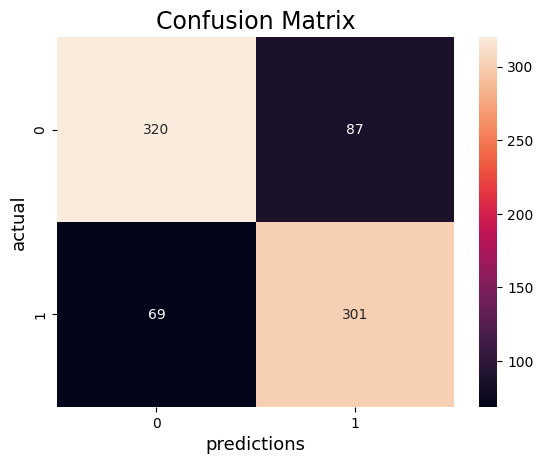

In [ ]:
predictions = svm.predict(X_test)
confusion = confusion_matrix(Y_test, predictions)
sns.heatmap(confusion, annot=True, fmt='g')
plt.ylabel('actual',fontsize=13)
plt.xlabel('predictions',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       407
           1       0.78      0.81      0.79       370

    accuracy                           0.80       777
   macro avg       0.80      0.80      0.80       777
weighted avg       0.80      0.80      0.80       777



RANDOM FOREST

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
predictions = rf.predict(X_test)
accrf=accuracy_score(Y_test, predictions)*100
print("Accuracy of Random Forest (%): \n",accrf)
#get FPR
recallrf=recall_score(Y_test,predictions)*100
print("Recall of Random Forest is: \n",recallrf)
precrf=precision_score(Y_test,predictions)*100
print("Precision of Random Forest is: \n",precrf)

Accuracy of Random Forest (%): 
 98.97039897039896
Recall of Random Forest is: 
 99.1891891891892
Precision of Random Forest is: 
 98.65591397849462


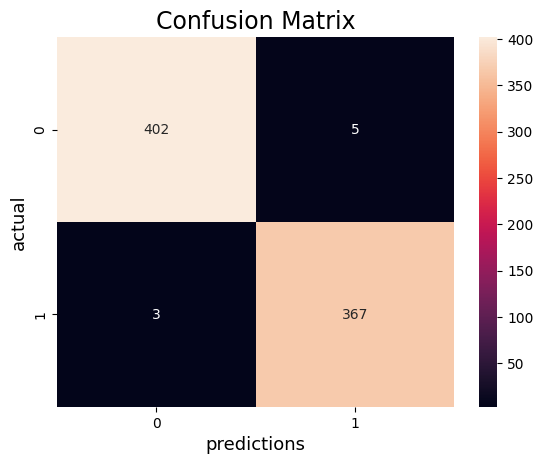

In [ ]:
predictions = rf.predict(X_test)
confusion = confusion_matrix(Y_test, predictions)
sns.heatmap(confusion, annot=True, fmt='g')
plt.ylabel('actual',fontsize=13)
plt.xlabel('predictions',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       407
           1       0.99      0.99      0.99       370

    accuracy                           0.99       777
   macro avg       0.99      0.99      0.99       777
weighted avg       0.99      0.99      0.99       777



NAIVE BAYES

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)
predictions = naive_bayes.predict(X_test)
accnaive_bayes=accuracy_score(Y_test, predictions)*100
print("Accuracy of Naive Bayes (%): \n",accnaive_bayes)
#get FPR
recallnaive_bayes=recall_score(Y_test,predictions)*100
print("Recall of Naive Bayes is: \n",recallnaive_bayes)
precnaive_bayes=precision_score(Y_test,predictions)*100
print("Precision of Naive Bayes is: \n",precnaive_bayes)

Accuracy of Naive Bayes (%): 
 62.16216216216216
Recall of Naive Bayes is: 
 32.16216216216216
Precision of Naive Bayes is: 
 73.4567901234568


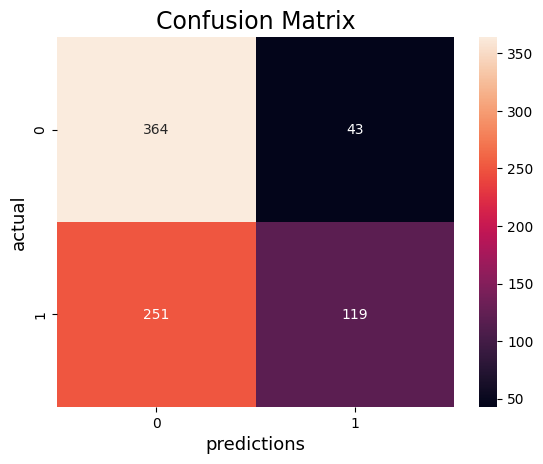

In [ ]:
predictions = naive_bayes.predict(X_test)
confusion = confusion_matrix(Y_test, predictions)
sns.heatmap(confusion, annot=True, fmt='g')
plt.ylabel('actual',fontsize=13)
plt.xlabel('predictions',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.59      0.89      0.71       407
           1       0.73      0.32      0.45       370

    accuracy                           0.62       777
   macro avg       0.66      0.61      0.58       777
weighted avg       0.66      0.62      0.59       777



### GRADIENT BOOSTING

In [ ]:
df

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,8.0,17.0,12.0,1.0,11.0,30.0,9.0,0.16,14.0,8.0,...,38.0,0.12,69.0,95.0,33.0,20.0,76.0,18.18,55.0,0
1,2.0,5.0,3.0,1.0,0.0,8.0,3.0,0.19,4.0,3.0,...,14.0,0.15,26.0,31.0,15.0,10.0,20.0,6.25,16.0,0
2,11.0,7.0,2.0,0.0,117.0,12.0,4.0,0.08,6.0,4.0,...,34.0,0.02,188.0,252.0,18.0,23.0,183.0,68.82,53.0,0
3,0.0,5.0,1.0,0.0,0.0,8.0,3.0,0.60,4.0,2.0,...,8.0,0.43,5.0,8.0,4.0,6.0,7.0,0.00,5.0,0
4,0.0,1.0,2.0,0.0,2.0,0.0,1.0,0.20,0.0,1.0,...,4.0,0.11,10.0,18.0,4.0,9.0,9.0,28.57,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,4.0,5.0,5.0,0.0,3.0,4.0,3.0,0.27,2.0,3.0,...,15.0,0.15,13.0,15.0,10.0,6.0,20.0,21.43,11.0,0
1984,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.00,0.0,1.0,...,2.0,0.50,0.0,0.0,0.0,0.0,2.0,0.00,0.0,0
1985,17.0,1.0,3.0,0.0,0.0,0.0,1.0,0.09,0.0,1.0,...,7.0,0.03,19.0,26.0,11.0,9.0,31.0,0.00,11.0,0
1986,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.00,0.0,1.0,...,4.0,0.50,2.0,4.0,2.0,3.0,2.0,0.00,0.0,0


In [ ]:
data= arff.loadarff('MC1.arff')
# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Inisialisasi model-model yang akan digabungkan
svm_model = SVC(probability=True)
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
nb_model = GaussianNB()

# Inisialisasi model ensemble dengan Gradient Boosting
ensemble_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Melatih model-model dasar
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# Membuat prediksi dari model-model dasar
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
nb_pred = nb_model.predict(X_test)

# Menggabungkan prediksi dari model-model dasar sebagai fitur untuk model ensemble
X_ensemble = np.column_stack((svm_pred, rf_pred, dt_pred, nb_pred))

# Melatih model ensemble
ensemble_model.fit(X_ensemble, y_test)

# Membuat prediksi menggunakan model ensemble
ensemble_pred = ensemble_model.predict(X_ensemble)


# Menampilkan laporan klasifikasi untuk model SVM
print("Classification Report of SVM Model:")
print(classification_report(y_test, svm_pred))

# Menampilkan laporan klasifikasi untuk model Random Forest
print("Classification Report of Random Forest Model:")
print(classification_report(y_test, rf_pred))

# Menampilkan laporan klasifikasi untuk model Decision Tree
print("Classification Report of Decision Tree Model:")
print(classification_report(y_test, dt_pred))

# Menampilkan laporan klasifikasi untuk model Naive Bayes
print("Classification Report of Naive Bayes Model:")
print(classification_report(y_test, nb_pred))

# Menghitung akurasi dari model ensemble
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)

# Mencetak akurasi model ensemble
print("Accuracy of Ensemble Model:", ensemble_accuracy)

Classification Report of SVM Model:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       395
           1       0.84      0.93      0.88       382

    accuracy                           0.88       777
   macro avg       0.88      0.88      0.88       777
weighted avg       0.88      0.88      0.88       777

Classification Report of Random Forest Model:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       395
           1       0.98      1.00      0.99       382

    accuracy                           0.99       777
   macro avg       0.99      0.99      0.99       777
weighted avg       0.99      0.99      0.99       777

Classification Report of Decision Tree Model:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       395
           1       0.97      0.98      0.98       382

    accuracy                           0.98       777


HASIL SELURUH ALGORITMA MURNI

In [ ]:
algos=["Decision Tree", "Support Vector Machine","Random Forrest","Naive Bayes"]
acc=[accdt,accsvm,accrf,accnaive_bayes]
recall=[recalldt,recallsvm,recallrf,recallnaive_bayes]
prec=[precdt,precsvm,precrf,precnaive_bayes]
comp={"Algorithms":algos,"Accuracies":acc,"Recall":recall,"Precision":prec}
compdf=pd.DataFrame(comp)
display(compdf.sort_values(by=["Accuracies","Recall","Precision"], ascending=False))

,Algorithms,Accuracies,Recall,Precision
2,Random Forrest,98.970399,99.189189,98.655914
0,Decision Tree,94.465894,97.297297,91.603053
1,Support Vector Machine,79.922780,81.351351,77.577320
3,Naive Bayes,62.162162,32.162162,73.456790
